<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().any().any()

False

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,5000.500,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,2886.896,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,1.000,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,2500.750,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,5000.500,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,7500.250,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,10000.000,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [7]:
df.pop("RowNumber")

0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: RowNumber, Length: 10000, dtype: int64

In [8]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [9]:
df.pop("CustomerId")

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

In [10]:
df.pop("Surname")

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [12]:
df.describe()   # We should make scaling.

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


<AxesSubplot:xlabel='CreditScore'>

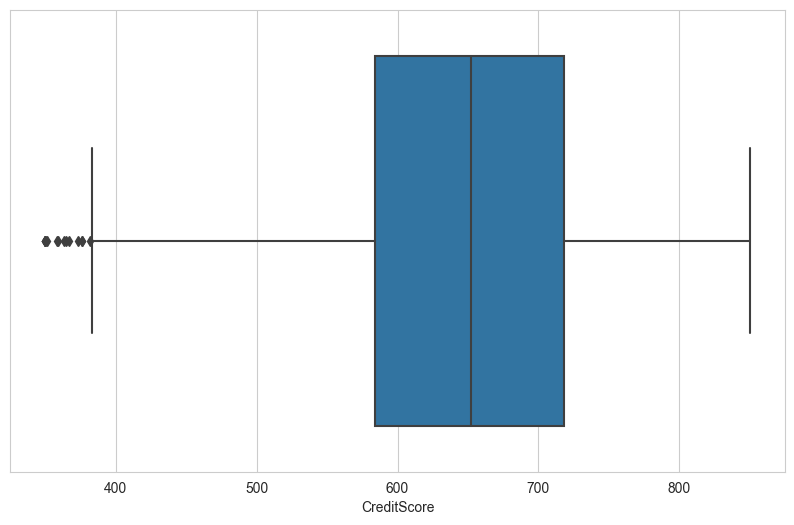

In [13]:
sns.boxplot(df.CreditScore)

In [14]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

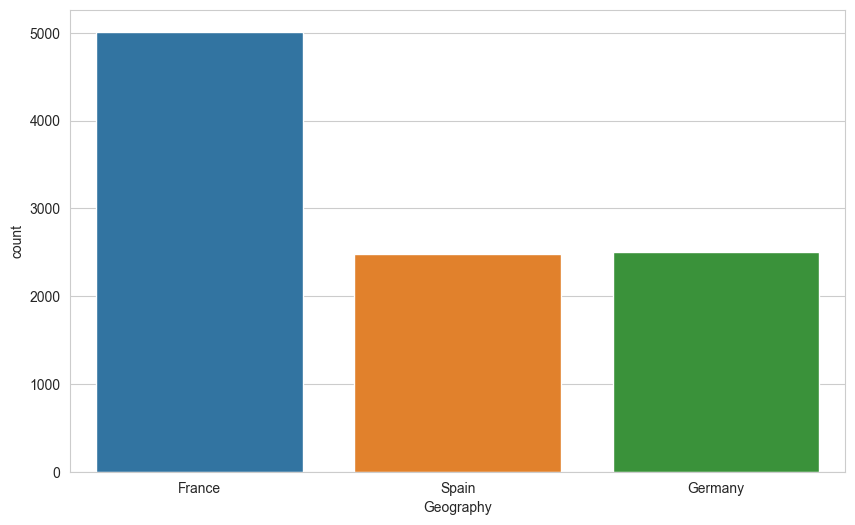

In [15]:
sns.countplot(df.Geography); # We can make OneHot Encoder.

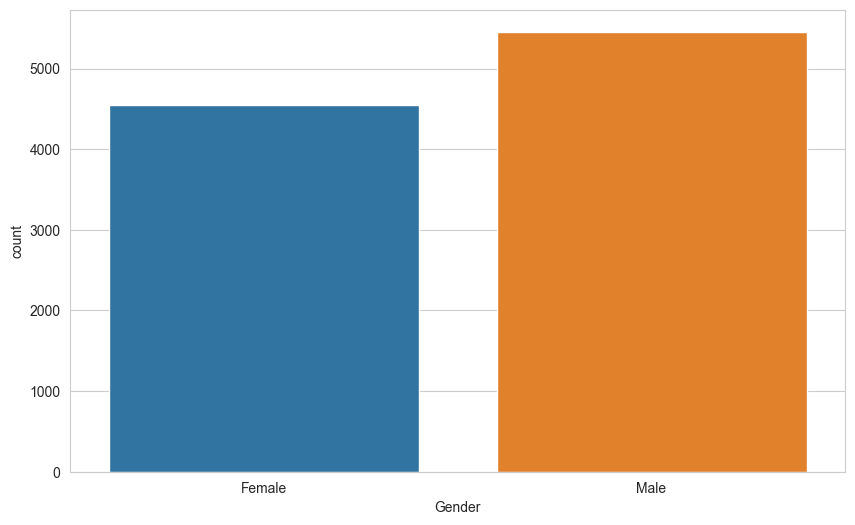

In [16]:
sns.countplot(df.Gender);

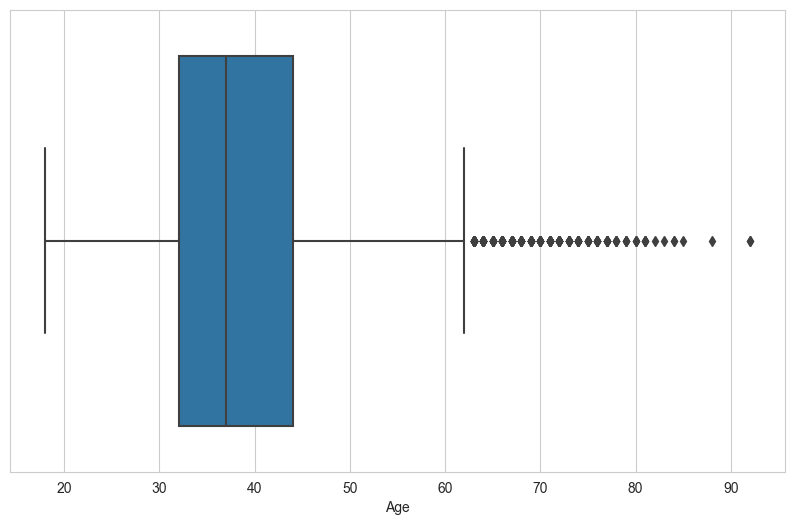

In [17]:
sns.boxplot(df.Age);

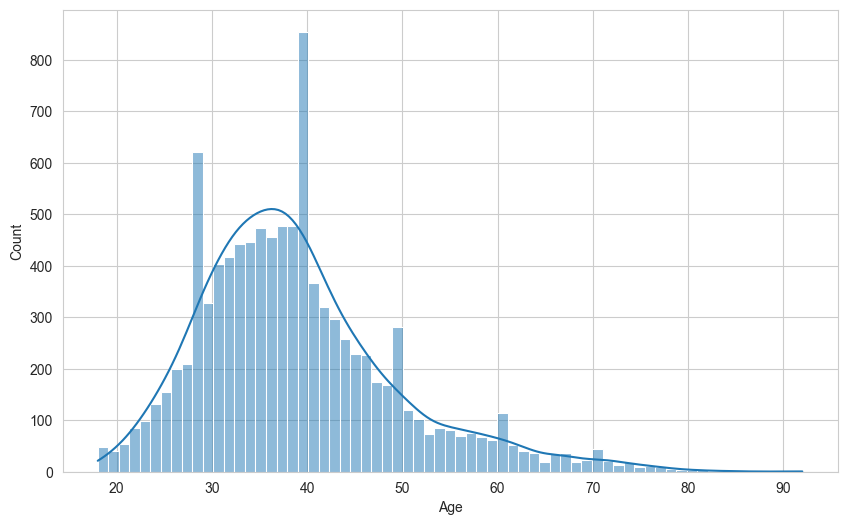

In [18]:
sns.histplot(df.Age,kde=True);

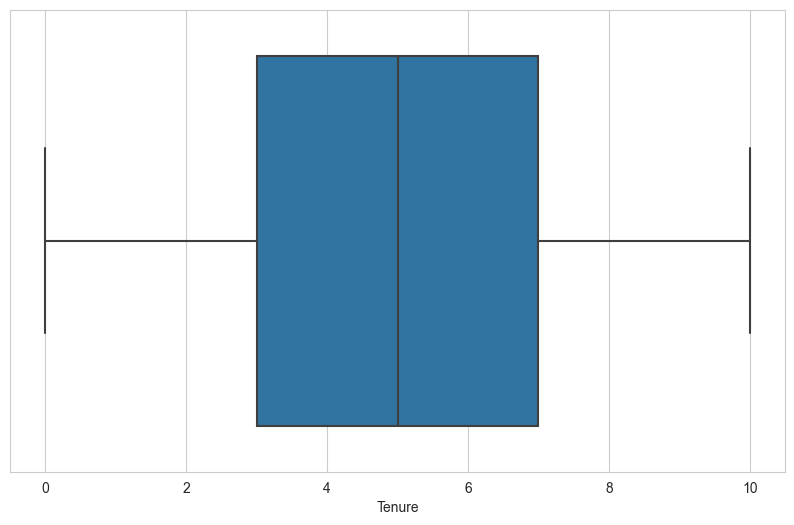

In [19]:
sns.boxplot(df.Tenure);

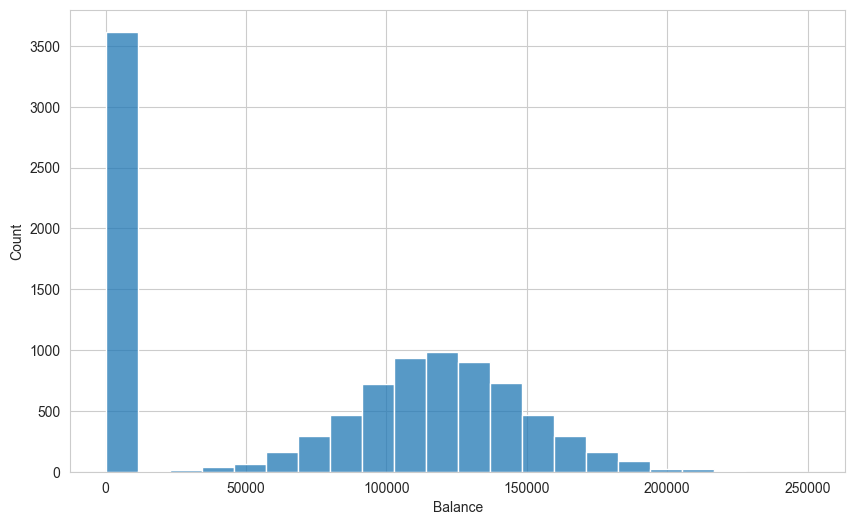

In [20]:
sns.histplot(df.Balance);

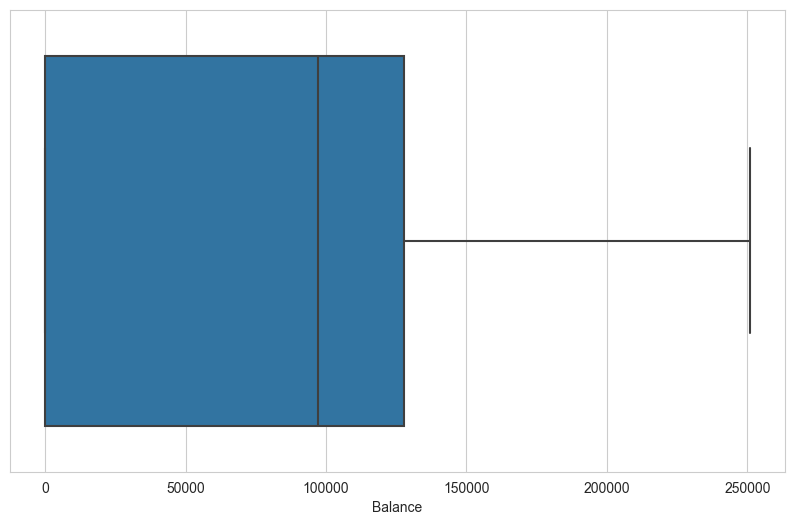

In [21]:
sns.boxplot(df.Balance);

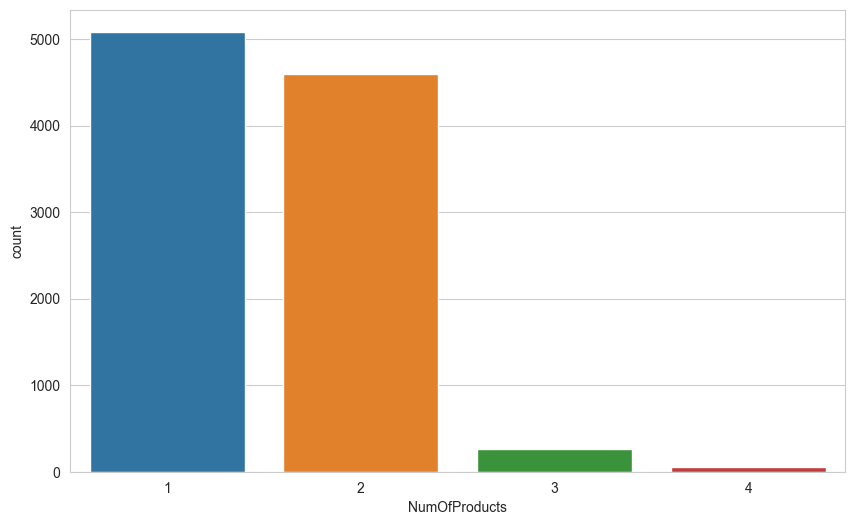

In [22]:
sns.countplot(df.NumOfProducts);

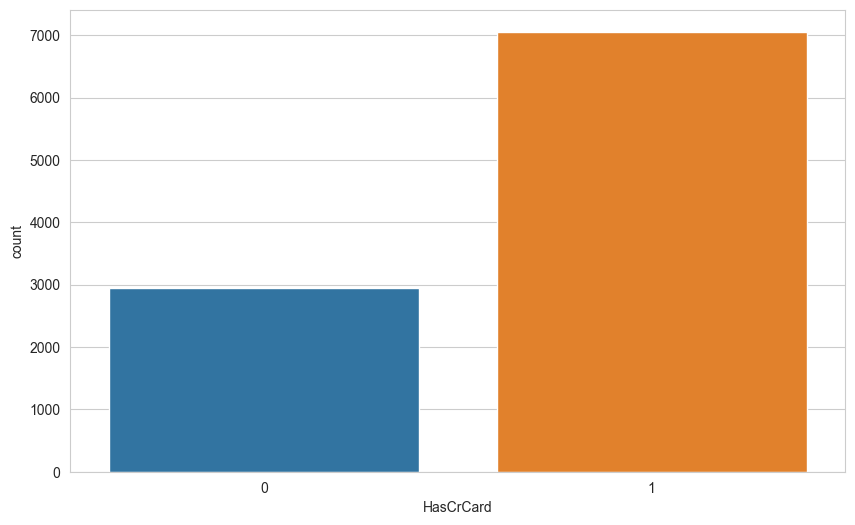

In [23]:
sns.countplot(df.HasCrCard);

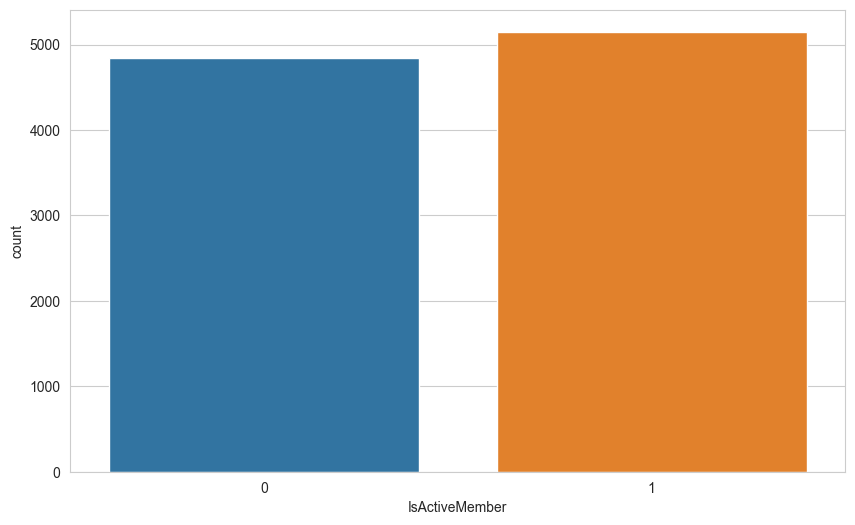

In [24]:
sns.countplot(df.IsActiveMember);

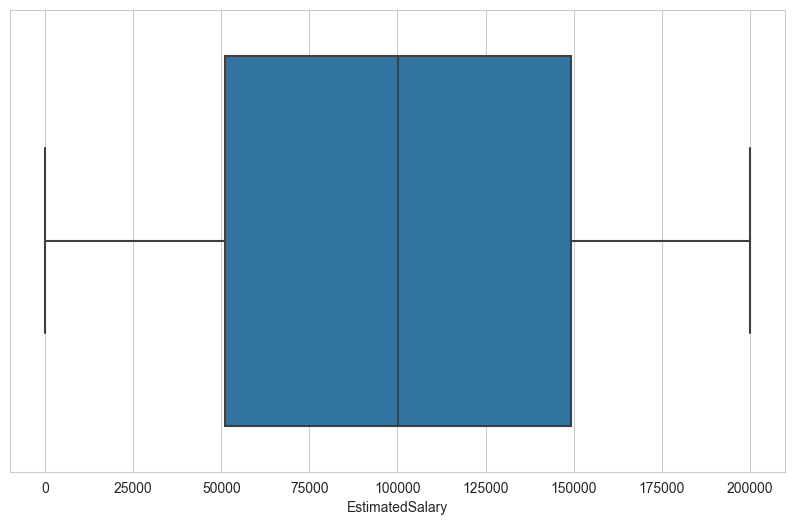

In [25]:
sns.boxplot(df.EstimatedSalary);

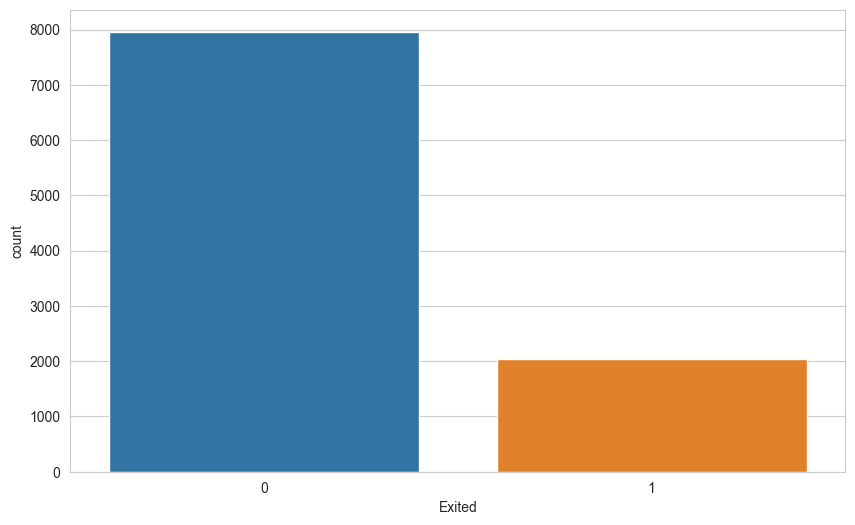

In [26]:
sns.countplot(df.Exited);

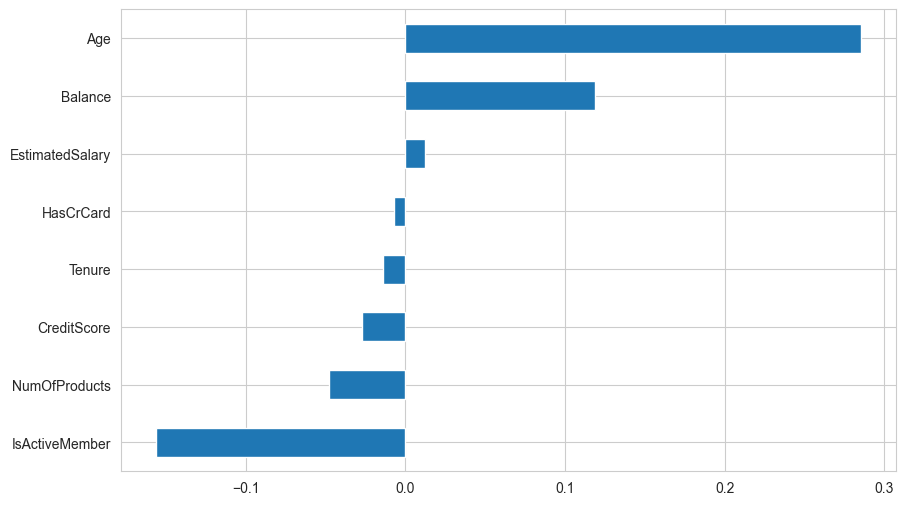

In [27]:
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

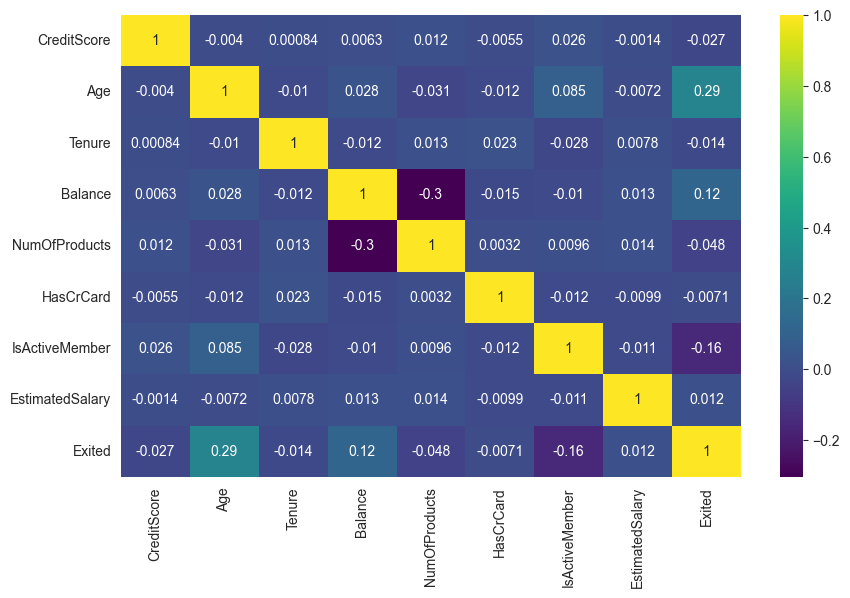

In [28]:
sns.heatmap(df.corr(),annot=True,cmap="viridis");

### We will transaction One-Hot Encoder in Geography and Gender columns.

# Preprocessing of Data
- Train | Test Split, Scalling

In [29]:
X=df.drop("Exited",axis=1)
y=df.Exited

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [32]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (8000, 10)
Train target shape   :  (8000,)
Test features shape  :  (2000, 10)
Test target shape    :  (2000,)


### Encoding Transactions

In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
enc=OrdinalEncoder()

In [35]:
categoric = X_train.select_dtypes("object").columns
categoric

Index(['Geography', 'Gender'], dtype='object')

In [36]:
X_train[categoric]

,Geography,Gender
6861,Spain,Male
9881,Spain,Female
4536,France,Female
8430,France,Female
6765,France,Female
...,...,...
599,Germany,Female
5695,France,Male
8006,Germany,Male
1361,France,Male


In [37]:
enc.fit_transform(X_train[categoric])

array([[2., 1.],
       [2., 0.],
       [0., 0.],
       ...,
       [1., 1.],
       [0., 1.],
       [2., 0.]])

In [38]:
X_train[categoric]=enc.fit_transform(X_train[categoric])

In [39]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6861,605,2.000,1.000,41,5,103154.660,1,0,0,143203.780
9881,687,2.000,0.000,40,1,0.000,2,1,0,8207.360
4536,642,0.000,0.000,55,7,0.000,2,1,1,101515.760
8430,612,0.000,0.000,38,7,110615.470,1,1,1,193502.930
6765,461,0.000,0.000,40,7,0.000,2,1,0,176547.800


In [40]:
X_train.Geography.value_counts()

0.000    4042
1.000    1988
2.000    1970
Name: Geography, dtype: int64

In [41]:
X_train.Gender.value_counts()

1.000    4359
0.000    3641
Name: Gender, dtype: int64

#### Geography  >>>> France = 0, Germany = 1, Spain=2

#### Gender >>>>  Male = 0 , Female = 1

In [42]:
X_test[categoric]=enc.transform(X_test[categoric])

In [43]:
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6676,619,2.000,1.000,52,8,0.000,2,1,1,123242.110
6421,616,0.000,1.000,23,8,73112.950,1,1,1,62733.050
9834,516,0.000,0.000,46,6,62212.290,1,0,1,171681.860
8492,494,0.000,1.000,28,9,114731.760,2,0,1,79479.740
9982,655,1.000,0.000,46,7,137145.120,1,1,0,115146.400


## Scaling 

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

In [48]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [49]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [50]:
X_train.shape

(8000, 10)

In [51]:
model= Sequential()

model.add(Dense(16,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["Recall"])

In [52]:
model.fit(X_train,y_train,validation_split=0.1,batch_size=32,epochs=100,verbose=1)

Epoch 1/100
225/225 [==============================] - 1s 2ms/step - loss: 0.5296 - recall: 0.0386 - val_loss: 0.4496 - val_recall: 0.0000e+00
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4835 - recall: 0.0000e+00 - val_loss: 0.4356 - val_recall: 0.0000e+00
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4621 - recall: 0.0447 - val_loss: 0.4211 - val_recall: 0.1014
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4491 - recall: 0.1457 - val_loss: 0.4146 - val_recall: 0.1087
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4442 - recall: 0.1978 - val_loss: 0.4096 - val_recall: 0.1304
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4362 - recall: 0.2114 - val_loss: 0.4036 - val_recall: 0.1377
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4297 - recall: 0.2249 - val_loss: 0.3997 - val_recall: 0.2464
Epoch 8/100
225

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 16) dtype=float32, numpy=
 array([[-7.9039298e-03,  1.7027222e-01,  3.8905680e-01,  4.1576499e-01,
         -1.6361026e-01,  1.9521974e-01, -6.0914818e-02, -9.4317170e-03,
         -3.1498656e-01,  6.1641890e-01,  3.1892526e-01,  3.0509496e-01,
         -2.2508734e-01,  5.6945246e-01, -4.6261955e-02, -5.1369365e-02],
        [-1.9876239e-01, -2.2004355e-02,  6.5791145e-02, -1.8298170e-02,
          1.3741800e-01,  1.0914334e-01,  5.6299525e-01, -8.1149060e-01,
         -2.5756669e-01, -1.9827779e-01,  4.9518508e-01, -6.3509387e-01,
         -4.6615916e-01, -4.2820910e-01, -2.1514359e-01,  9.9350005e-02],
        [ 7.6371878e-02,  3.3851855e-02, -2.4128202e-01,  3.4456214e-01,
          2.6689389e-01,  2.6083955e-01, -5.7321769e-01, -5.9038615e-03,
          3.1121272e-01,  6.9409192e-02,  4.8044020e-01,  1.7604366e-02,
         -2.6085824e-02,  3.5311079e-01, -1.8993415e-02,  8.8156294e-04],
        [ 7.4238247e-01, -1.0978215e+00,  5.8396798e-

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve,precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [56]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.530,0.039,0.450,0.000
1,0.483,0.000,0.436,0.000
2,0.462,0.045,0.421,0.101
3,0.449,0.146,0.415,0.109
4,0.444,0.198,0.410,0.130


<AxesSubplot:>

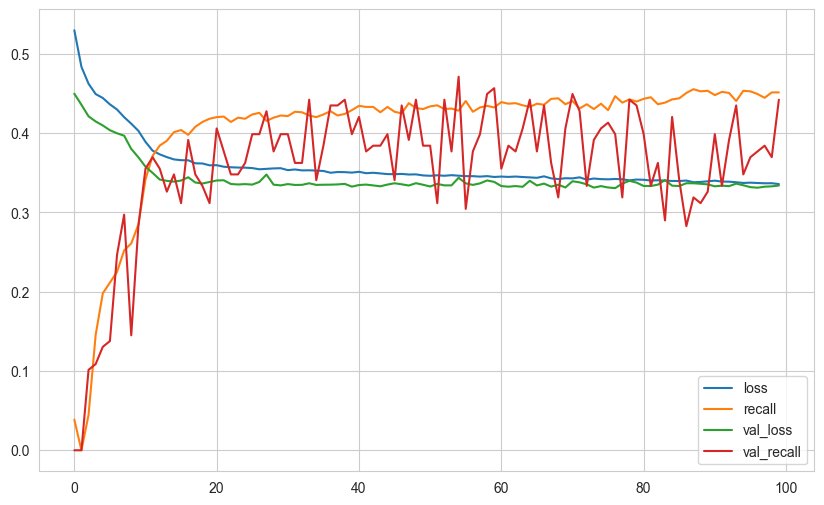

In [57]:
loss_df.plot()

In [58]:
model.evaluate(X_test, y_test, verbose=0)

[0.3391120731830597, 0.5248227119445801]

In [59]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3391120731830597
accuracy :  0.5248227119445801


In [60]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 841us/step
[[1496   81]
 [ 201  222]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1577
           1       0.73      0.52      0.61       423

    accuracy                           0.86      2000
   macro avg       0.81      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



#### There is quite a difference between the Recall and F1 scores of 0 and 1. 
#### This difference is due to unbalanced data.

63/63 [==============================] - 0s 565us/step


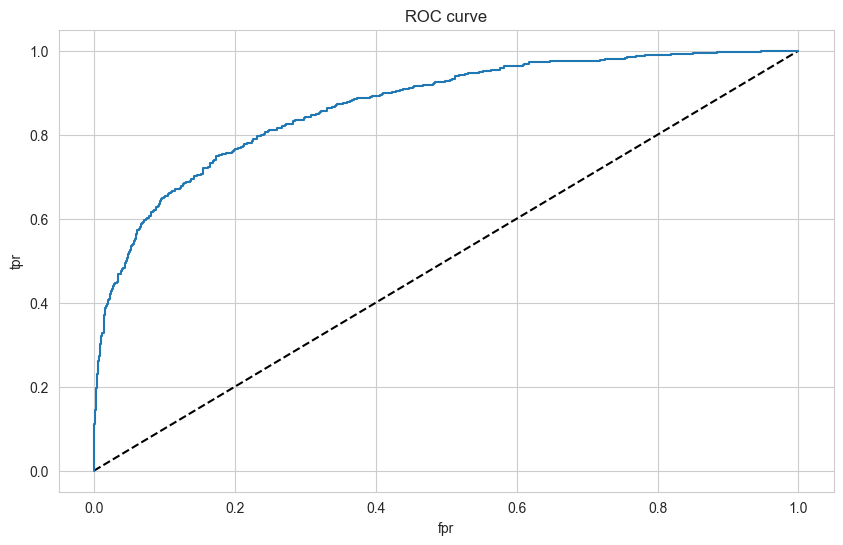

In [61]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [62]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [63]:
model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu",))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [64]:
from sklearn.utils import class_weight

In [65]:
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)

In [66]:
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6263701847792045, 1: 2.4783147459727384}

In [67]:
model.fit(X_train, y_train, class_weight=class_weights,validation_split = 0.1, batch_size = 32, epochs = 100, verbose=1 )

Epoch 1/100
225/225 [==============================] - 1s 1ms/step - loss: 0.6957 - recall: 0.3767 - val_loss: 0.7048 - val_recall: 0.6522
Epoch 2/100
225/225 [==============================] - 0s 946us/step - loss: 0.6605 - recall: 0.6734 - val_loss: 0.6833 - val_recall: 0.7536
Epoch 3/100
225/225 [==============================] - 0s 983us/step - loss: 0.6112 - recall: 0.6972 - val_loss: 0.6053 - val_recall: 0.7101
Epoch 4/100
225/225 [==============================] - 0s 977us/step - loss: 0.5819 - recall: 0.7053 - val_loss: 0.5407 - val_recall: 0.6377
Epoch 5/100
225/225 [==============================] - 0s 914us/step - loss: 0.5582 - recall: 0.7127 - val_loss: 0.6025 - val_recall: 0.7971
Epoch 6/100
225/225 [==============================] - 0s 964us/step - loss: 0.5415 - recall: 0.7263 - val_loss: 0.5092 - val_recall: 0.7029
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.5290 - recall: 0.7425 - val_loss: 0.4788 - val_recall: 0.6667
Epoch 8/100
225/2

Epoch 59/100
225/225 [==============================] - 0s 933us/step - loss: 0.4724 - recall: 0.7703 - val_loss: 0.4739 - val_recall: 0.7536
Epoch 60/100
225/225 [==============================] - 0s 938us/step - loss: 0.4726 - recall: 0.7703 - val_loss: 0.4811 - val_recall: 0.7391
Epoch 61/100
225/225 [==============================] - 0s 936us/step - loss: 0.4725 - recall: 0.7724 - val_loss: 0.4447 - val_recall: 0.7101
Epoch 62/100
225/225 [==============================] - 0s 927us/step - loss: 0.4710 - recall: 0.7757 - val_loss: 0.4541 - val_recall: 0.6739
Epoch 63/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4703 - recall: 0.7724 - val_loss: 0.4047 - val_recall: 0.6594
Epoch 64/100
225/225 [==============================] - 0s 1ms/step - loss: 0.4731 - recall: 0.7764 - val_loss: 0.4121 - val_recall: 0.6594
Epoch 65/100
225/225 [==============================] - 0s 900us/step - loss: 0.4706 - recall: 0.7696 - val_loss: 0.4241 - val_recall: 0.6522
Epoch 66/1

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [68]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.696,0.377,0.705,0.652
1,0.661,0.673,0.683,0.754
2,0.611,0.697,0.605,0.710
3,0.582,0.705,0.541,0.638
4,0.558,0.713,0.602,0.797
...,...,...,...,...
95,0.466,0.772,0.450,0.696
96,0.464,0.781,0.410,0.659
97,0.464,0.769,0.430,0.674
98,0.467,0.774,0.429,0.674


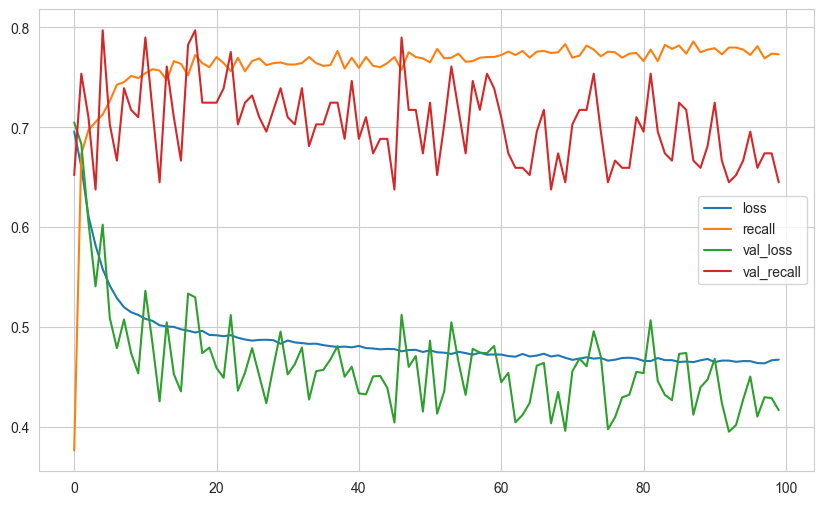

In [69]:
loss_df.plot();

In [70]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.4257016181945801
accuracy :  0.7446808218955994


In [71]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 504us/step
[[1284  293]
 [ 108  315]]
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1577
           1       0.52      0.74      0.61       423

    accuracy                           0.80      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.80      0.81      2000



In [72]:
y_pred_proba = model.predict(X_test)

63/63 [==============================] - 0s 960us/step


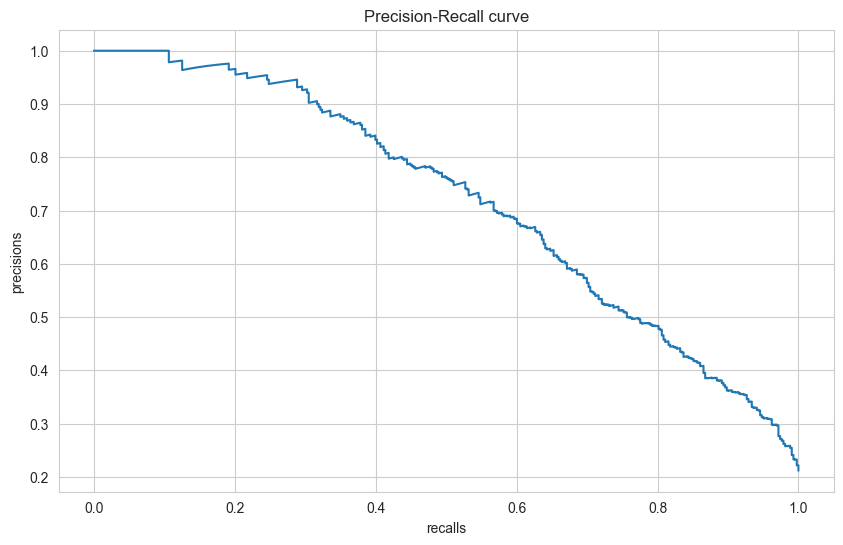

In [73]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()


## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [74]:
model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [75]:
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)

In [76]:
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6263701847792045, 1: 2.4783147459727384}

In [77]:
model.fit(X_train, y_train, class_weight=class_weights,validation_split = 0.1, batch_size = 32, epochs = 100, verbose=1 )

Epoch 1/100
225/225 [==============================] - 1s 2ms/step - loss: 0.6671 - recall: 0.6755 - val_loss: 0.6947 - val_recall: 0.6377
Epoch 2/100
225/225 [==============================] - 0s 1ms/step - loss: 0.6307 - recall: 0.6430 - val_loss: 0.6528 - val_recall: 0.6377
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.6054 - recall: 0.6491 - val_loss: 0.6896 - val_recall: 0.7609
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.5793 - recall: 0.6545 - val_loss: 0.5844 - val_recall: 0.6304
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.5515 - recall: 0.7026 - val_loss: 0.5885 - val_recall: 0.7391
Epoch 6/100
225/225 [==============================] - 0s 969us/step - loss: 0.5310 - recall: 0.6938 - val_loss: 0.5095 - val_recall: 0.6739
Epoch 7/100
225/225 [==============================] - 0s 986us/step - loss: 0.5171 - recall: 0.7229 - val_loss: 0.4626 - val_recall: 0.6522
Epoch 8/100
225/225 [==

225/225 [==============================] - 0s 1ms/step - loss: 0.4533 - recall: 0.7636 - val_loss: 0.4780 - val_recall: 0.7319
Epoch 60/100
225/225 [==============================] - 0s 907us/step - loss: 0.4518 - recall: 0.7744 - val_loss: 0.4382 - val_recall: 0.6739
Epoch 61/100
225/225 [==============================] - 0s 915us/step - loss: 0.4515 - recall: 0.7656 - val_loss: 0.4616 - val_recall: 0.7174
Epoch 62/100
225/225 [==============================] - 0s 891us/step - loss: 0.4509 - recall: 0.7730 - val_loss: 0.4122 - val_recall: 0.6232
Epoch 63/100
225/225 [==============================] - 0s 844us/step - loss: 0.4492 - recall: 0.7710 - val_loss: 0.5142 - val_recall: 0.7536
Epoch 64/100
225/225 [==============================] - 0s 884us/step - loss: 0.4514 - recall: 0.7724 - val_loss: 0.4521 - val_recall: 0.6667
Epoch 65/100
225/225 [==============================] - 0s 920us/step - loss: 0.4504 - recall: 0.7730 - val_loss: 0.4308 - val_recall: 0.6739
Epoch 66/100
225/225 

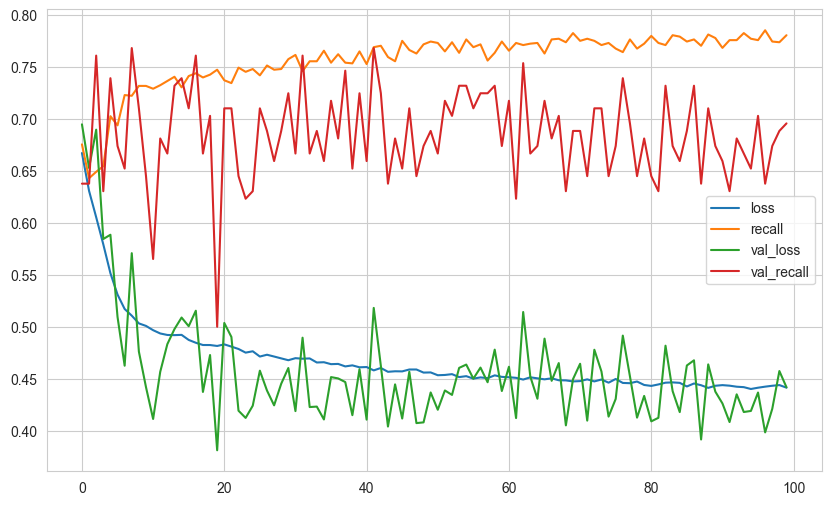

In [78]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [79]:
y_pred = (model.predict(X_test) > 0.5)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 501us/step
[[1236  341]
 [  97  326]]
              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1577
           1       0.49      0.77      0.60       423

    accuracy                           0.78      2000
   macro avg       0.71      0.78      0.72      2000
weighted avg       0.83      0.78      0.80      2000



63/63 [==============================] - 0s 652us/step


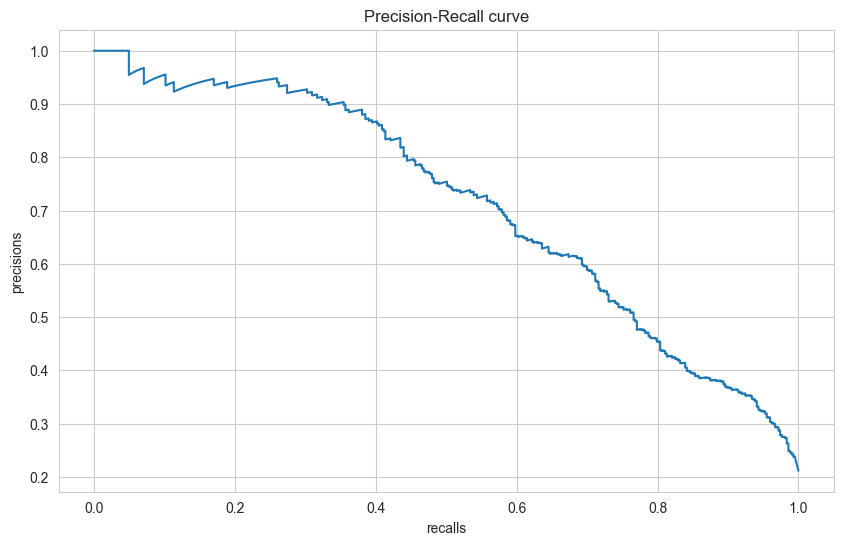

In [80]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()


### Add Dropout Layer

In [81]:
from tensorflow.keras.layers import Dropout

In [82]:
model = Sequential()

model.add(Dense(16, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dropout(0.1))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(4, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss ="binary_crossentropy", metrics=['Recall'])

In [83]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32,class_weight=class_weights, epochs = 100, verbose = 1)

Epoch 1/100
225/225 [==============================] - 1s 2ms/step - loss: 0.6925 - recall: 0.5488 - val_loss: 0.6867 - val_recall: 0.6377
Epoch 2/100
225/225 [==============================] - 0s 967us/step - loss: 0.6673 - recall: 0.6267 - val_loss: 0.6384 - val_recall: 0.5362
Epoch 3/100
225/225 [==============================] - 0s 1ms/step - loss: 0.6467 - recall: 0.6159 - val_loss: 0.6130 - val_recall: 0.5652
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.6341 - recall: 0.6070 - val_loss: 0.6125 - val_recall: 0.6522
Epoch 5/100
225/225 [==============================] - 0s 1ms/step - loss: 0.6287 - recall: 0.6375 - val_loss: 0.6263 - val_recall: 0.6884
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.6244 - recall: 0.6260 - val_loss: 0.6369 - val_recall: 0.6884
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.6181 - recall: 0.6491 - val_loss: 0.5984 - val_recall: 0.6594
Epoch 8/100
225/225 [====

Epoch 59/100
225/225 [==============================] - 0s 969us/step - loss: 0.5161 - recall: 0.7358 - val_loss: 0.4617 - val_recall: 0.6957
Epoch 60/100
225/225 [==============================] - 0s 944us/step - loss: 0.5096 - recall: 0.7432 - val_loss: 0.4637 - val_recall: 0.6884
Epoch 61/100
225/225 [==============================] - 0s 937us/step - loss: 0.5042 - recall: 0.7514 - val_loss: 0.4223 - val_recall: 0.6304
Epoch 62/100
225/225 [==============================] - 0s 937us/step - loss: 0.5070 - recall: 0.7439 - val_loss: 0.4778 - val_recall: 0.6957
Epoch 63/100
225/225 [==============================] - 0s 930us/step - loss: 0.5035 - recall: 0.7392 - val_loss: 0.4520 - val_recall: 0.6739
Epoch 64/100
225/225 [==============================] - 0s 952us/step - loss: 0.5064 - recall: 0.7358 - val_loss: 0.4583 - val_recall: 0.7029
Epoch 65/100
225/225 [==============================] - 0s 931us/step - loss: 0.5100 - recall: 0.7514 - val_loss: 0.4614 - val_recall: 0.7029
Epoch 

<AxesSubplot:>

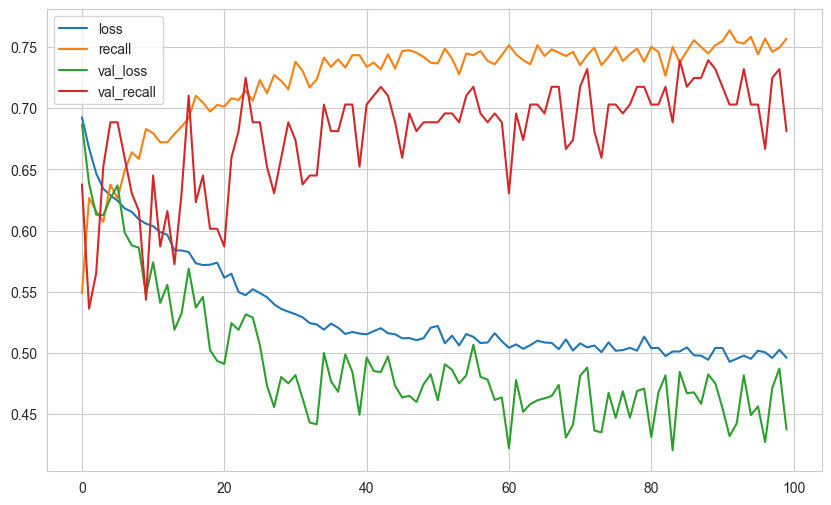

In [84]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [85]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 448us/step
[[1274  303]
 [ 102  321]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1577
           1       0.51      0.76      0.61       423

    accuracy                           0.80      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.80      0.81      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [86]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [87]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, callbacks = [early_stop])

Epoch 1/100
225/225 [==============================] - 0s 984us/step - loss: 0.3858 - recall: 0.4472 - val_loss: 0.3319 - val_recall: 0.3696
Epoch 2/100
225/225 [==============================] - 0s 907us/step - loss: 0.3725 - recall: 0.4221 - val_loss: 0.3316 - val_recall: 0.3188
Epoch 3/100
225/225 [==============================] - 0s 991us/step - loss: 0.3681 - recall: 0.4201 - val_loss: 0.3281 - val_recall: 0.3333
Epoch 4/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3657 - recall: 0.4221 - val_loss: 0.3308 - val_recall: 0.3551
Epoch 5/100
225/225 [==============================] - 0s 996us/step - loss: 0.3659 - recall: 0.4370 - val_loss: 0.3291 - val_recall: 0.3478
Epoch 6/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3668 - recall: 0.4336 - val_loss: 0.3287 - val_recall: 0.3333
Epoch 7/100
225/225 [==============================] - 0s 1ms/step - loss: 0.3640 - recall: 0.4241 - val_loss: 0.3284 - val_recall: 0.3768
Epoch 8/100
225/225

#### Monitor the "val_recall" as metric

<AxesSubplot:>

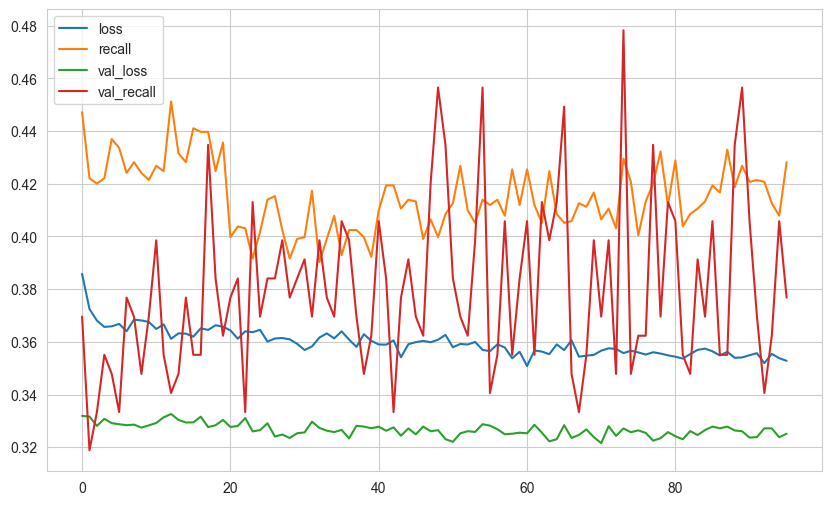

In [88]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## GridSearchCV

In [89]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [90]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [91]:
class_weights

{0: 0.6263701847792045, 1: 2.4783147459727384}

In [92]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [93]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 100)

parameters = {'batch_size': [32, 64, 128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train,class_weight=class_weights, callbacks = [early_stop])

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Epoch 1/100
57/57 [==============================] - 1s 4ms/step - loss: 0.6861 - recall: 0.7209 - val_loss: 0.6635 - val_recall: 0.5725
Epoch 2/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6723 - recall: 0.6314 - val_loss: 0.6680 - val_recall: 0.6739
Epoch 3/100
57/57 [==============================] - 0s 1ms/step - loss: 0.6605 - recall: 0.6816 - val_loss: 0.6633 - val_recall: 0.6884
Epoch 4/100
57/57 [==============================] - 0s 1ms/step - loss: 0.6488 - recall: 0.6951 - val_loss: 0.6485 - val_recall: 0.7101
Epoch 5/100
57/57 [==============================] - 0s 1ms/step - loss: 0.6370 - recall: 0.6931 - val_loss: 0.6553 - val_recall: 0.7536
Epoch 6/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6248 - recall: 0.7148 - val_loss: 0.6516 - val_recall: 0.7536
Epoch 7/100
57/57 [==============================] - 0s 2ms/step - loss: 0.6119 - recall: 0.7243 - val_loss: 0.6100

Epoch 60/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4982 - recall: 0.7568 - val_loss: 0.4683 - val_recall: 0.7029
Epoch 61/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4979 - recall: 0.7588 - val_loss: 0.4663 - val_recall: 0.7101
Epoch 62/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4971 - recall: 0.7615 - val_loss: 0.5074 - val_recall: 0.7464
Epoch 63/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4966 - recall: 0.7663 - val_loss: 0.4873 - val_recall: 0.7174
Epoch 64/100
57/57 [==============================] - 0s 2ms/step - loss: 0.4969 - recall: 0.7547 - val_loss: 0.4864 - val_recall: 0.7174
Epoch 65/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4961 - recall: 0.7622 - val_loss: 0.4663 - val_recall: 0.7029
Epoch 66/100
57/57 [==============================] - 0s 1ms/step - loss: 0.4959 - recall: 0.7622 - val_loss: 0.4718 - val_recall: 0.7029
Epoch 67/100
57/57 [==============

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x000001ECA5118EB0>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64, 128],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='recall', verbose=1)

In [94]:
grid_model.best_score_

0.7035504139625854

In [95]:
grid_model.best_params_

{'batch_size': 128,
 'learn_rate': 0.001,
 'optimizer': keras.optimizers.optimizer_v2.nadam.Nadam}

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [96]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 372us/step
[[1298  279]
 [ 113  310]]
              precision    recall  f1-score   support

           0       0.92      0.82      0.87      1577
           1       0.53      0.73      0.61       423

    accuracy                           0.80      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.80      0.81      2000



63/63 [==============================] - 0s 420us/step


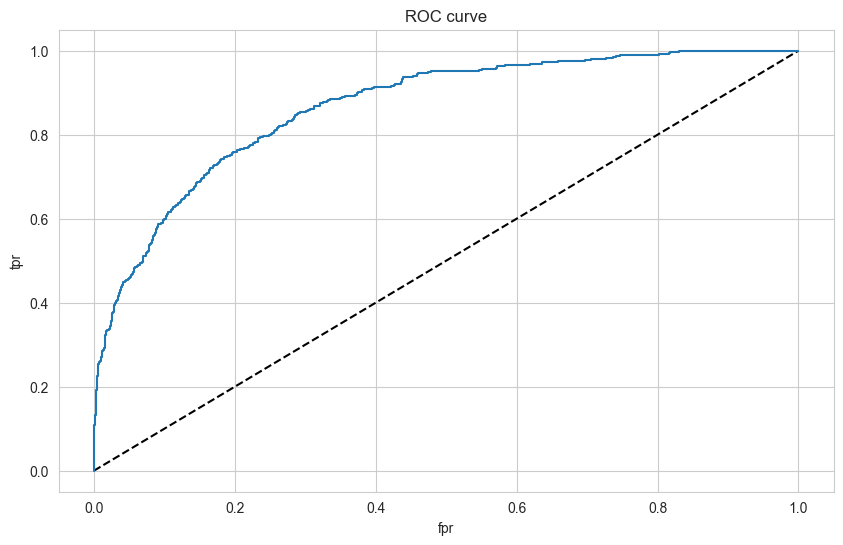

In [97]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Final Model and Model Deployment

In [98]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [99]:
model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = RMSprop(lr=0.001)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [100]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [101]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=128,
          epochs=100,
          verbose=1,
          class_weight=class_weights) 

Epoch 1/100
63/63 [==============================] - 1s 4ms/step - loss: 0.6856 - recall: 0.7119 - val_loss: 0.6183 - val_recall: 0.4917
Epoch 2/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6447 - recall: 0.6369 - val_loss: 0.6716 - val_recall: 0.7518
Epoch 3/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6305 - recall: 0.6729 - val_loss: 0.5912 - val_recall: 0.5721
Epoch 4/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6216 - recall: 0.6592 - val_loss: 0.6479 - val_recall: 0.7187
Epoch 5/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6120 - recall: 0.6877 - val_loss: 0.5328 - val_recall: 0.5059
Epoch 6/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6065 - recall: 0.6592 - val_loss: 0.5995 - val_recall: 0.6714
Epoch 7/100
63/63 [==============================] - 0s 2ms/step - loss: 0.6009 - recall: 0.6815 - val_loss: 0.5395 - val_recall: 0.5745
Epoch 8/100
63/63 [======================

<AxesSubplot:>

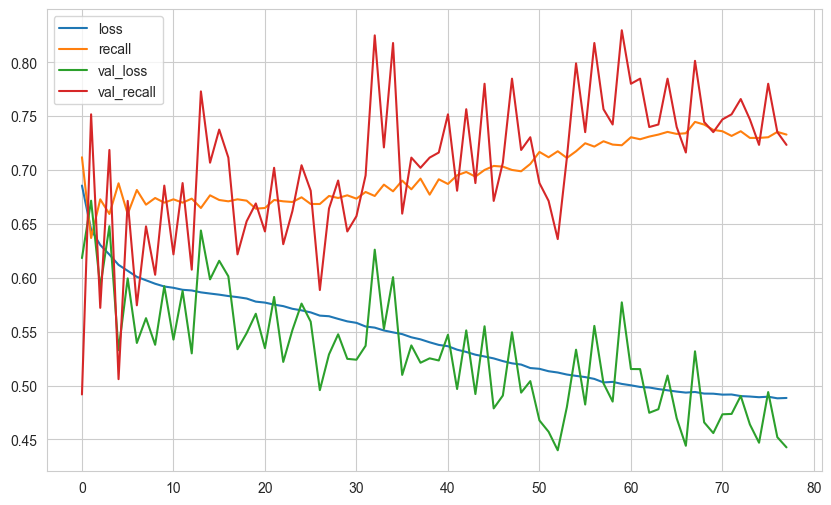

In [102]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [103]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 577us/step
[[1347  230]
 [ 154  269]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.88      1577
           1       0.54      0.64      0.58       423

    accuracy                           0.81      2000
   macro avg       0.72      0.75      0.73      2000
weighted avg       0.82      0.81      0.81      2000



In [104]:
model.save('model_churn')

INFO:tensorflow:Assets written to: model_churn\assets


## Prediction

In [115]:
data =df.copy()

In [116]:
from sklearn.preprocessing import OrdinalEncoder

In [118]:
enc=OrdinalEncoder()

In [119]:
categoric = data.select_dtypes("object").columns
categoric

Index(['Geography', 'Gender'], dtype='object')

In [120]:
data[categoric]

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female
...,...,...
9995,France,Male
9996,France,Male
9997,France,Female
9998,Germany,Male


In [121]:
enc.fit_transform(data[categoric])

array([[0., 0.],
       [2., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [1., 1.],
       [0., 0.]])

In [122]:
data[categoric]=enc.fit_transform(data[categoric])

In [123]:
data_df = pd.DataFrame(data)

In [130]:
prediction= data_df.drop(columns="Exited").iloc[101]
prediction

CreditScore          623.000
Geography              0.000
Gender                 0.000
Age                   44.000
Tenure                 6.000
Balance                0.000
NumOfProducts          2.000
HasCrCard              0.000
IsActiveMember         0.000
EstimatedSalary   167162.430
Name: 101, dtype: float64

In [132]:
prediction=scaler.transform(prediction.values.reshape(-1, 10))

In [137]:
y_pred =(model.predict(prediction) > 0.5).astype("int32")
y_pred

1/1 [==============================] - 0s 16ms/step


array([[0]])

In [138]:
data_df["Exited"].iloc[101]

0